# Dimensionality Reduction

<a href="https://colab.research.google.com/github/chu-ise/411A-2022/blob/main/notebooks/09/09-01_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Principal Component Analysis for Dimensionality Reduction

In [1]:
from sklearn.datasets import fetch_20newsgroups

# select the categories of interest for the newsgroups dataset
categories = ["alt.atheism", "talk.religion.misc", "comp.graphics", "sci.space"]

# fetch training data
newsgroups_train = fetch_20newsgroups(
    subset="train",
    # fetch body text only
    remove=("headers", "footers", "quotes"),
    categories=categories,
)

# fetch test data
newsgroups_test = fetch_20newsgroups(
    subset="test", remove=("headers", "footers", "quotes"), categories=categories
)

X_train = newsgroups_train.data  # Training dataset documents
y_train = newsgroups_train.target  # Training dataset labels

X_test = newsgroups_test.data  # Test dataset documents
y_test = newsgroups_test.target  # Test dataset labels
print(len(X_train), len(X_test))
print("train:", X_train[0])
print("test:", X_test[0])

2034 1353
train: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
test: TRry the SKywatch project in  Arizona.


In [3]:
import nltk


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}")  # Regular expression tokenizer
english_stops = set(stopwords.words("english"))  # English stop words


def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # portr stemmer 적용
    features = list(map(lambda token: PorterStemmer().stem(token), words))
    return features


tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train_tfidf, y_train)

print("#Train set score: {:.3f}".format(LR_clf.score(X_train_tfidf, y_train)))
print("#Test set score: {:.3f}".format(LR_clf.score(X_test_tfidf, y_test)))


#Train set score: 0.962
#Test set score: 0.761


PCA ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

print("Original tfidf matrix shape:", X_train_tfidf.shape)
print("PCA Converted matrix shape:", X_train_pca.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        pca.explained_variance_ratio_.sum()
    )
)


Original tfidf matrix shape: (2034, 20085)
PCA Converted matrix shape: (2034, 2000)
Sum of explained variance ratio: 1.000


In [7]:
LR_clf.fit(X_train_pca, y_train)
print("#Train set score: {:.3f}".format(LR_clf.score(X_train_pca, y_train)))
print("#Test set score: {:.3f}".format(LR_clf.score(X_test_pca, y_test)))


#Train set score: 0.962
#Test set score: 0.761


In [8]:
lasso_clf = LogisticRegression(penalty="l1", solver="liblinear", C=1)
lasso_clf.fit(X_train_tfidf, y_train)

print("#Train set score: {:.3f}".format(lasso_clf.score(X_train_tfidf, y_train)))
print("#Test set score: {:.3f}".format(lasso_clf.score(X_test_tfidf, y_test)))

import numpy as np

# 계수(coefficient) 중에서 0이 아닌 것들의 개수를 출력
print(
    "#Used features count: {}".format(np.sum(lasso_clf.coef_ != 0)),
    "out of",
    X_train_tfidf.shape[1],
)


#Train set score: 0.790
#Test set score: 0.718
#Used features count: 321 out of 20085


In [9]:
pca = PCA(n_components=321, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print("PCA Converted X shape:", X_train_pca.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        pca.explained_variance_ratio_.sum()
    )
)

LR_clf.fit(X_train_pca, y_train)
print("#Train set score: {:.3f}".format(LR_clf.score(X_train_pca, y_train)))
print("#Test set score: {:.3f}".format(LR_clf.score(X_test_pca, y_test)))


PCA Converted X shape: (2034, 321)
Sum of explained variance ratio: 0.437
#Train set score: 0.875
#Test set score: 0.751


In [10]:
pca = PCA(n_components=100, random_state=7)

X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())
print("PCA Converted X shape:", X_train_pca.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        pca.explained_variance_ratio_.sum()
    )
)

LR_clf.fit(X_train_pca, y_train)
print("#Train set score: {:.3f}".format(LR_clf.score(X_train_pca, y_train)))
print("#Test set score: {:.3f}".format(LR_clf.score(X_test_pca, y_test)))


PCA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.211
#Train set score: 0.807
#Test set score: 0.738


### Latent Semantic Analysis for Dimensionality Reduction


In [11]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2000, random_state=7)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print("LSA Converted X shape:", X_train_lsa.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        svd.explained_variance_ratio_.sum()
    )
)

LR_clf.fit(X_train_lsa, y_train)
print("#Train set score: {:.3f}".format(LR_clf.score(X_train_lsa, y_train)))
print("#Test set score: {:.3f}".format(LR_clf.score(X_test_lsa, y_test)))


LSA Converted X shape: (2034, 2000)
Sum of explained variance ratio: 1.000
#Train set score: 0.962
#Test set score: 0.761


In [12]:
svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print("LSA Converted X shape:", X_train_lsa.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        svd.explained_variance_ratio_.sum()
    )
)

LR_clf.fit(X_train_lsa, y_train)
print("#Train set score: {:.3f}".format(LR_clf.score(X_train_lsa, y_train)))
print("#Test set score: {:.3f}".format(LR_clf.score(X_test_lsa, y_test)))


LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209
#Train set score: 0.810
#Test set score: 0.745


### Document Similarity using LSA


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

print("Categories:", newsgroups_train.target_names)
print("Category of the fisrt document:", y_train[0])

sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)

print("#Top 20 simliarity(lsa):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 index(lsa):\n", sim_index)
sim_labels = [y_train[i] for i in sim_index]
print("#Top 20 labels(lsa):\n", sim_labels)


Categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
Category of the fisrt document: 1
#Top 20 simliarity(lsa):
 [1.0, 0.74, 0.74, 0.72, 0.7, 0.7, 0.69, 0.67, 0.66, 0.65, 0.65, 0.65, 0.63, 0.62, 0.62, 0.62, 0.57, 0.57, 0.55, 0.54]
#Top 20 index(lsa):
 [   0 1957 1674  501 1995 1490  790 1902 1575 1209 1728  892 1892  998
 1038 1826 1290 1089  867  151]
#Top 20 labels(lsa):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
sim_result = cosine_similarity(X_train_tfidf[0], X_train_tfidf)

print("#Top 20 simliarity(tfidf):\n", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 index(tfidf):\n", sim_index)
sim_labels = [y_train[i] for i in sim_index]
print("#Top 20 labels(tfidf):\n", sim_labels)


#Top 20 simliarity(tfidf):
 [1.0, 0.3, 0.22, 0.21, 0.19, 0.19, 0.19, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.14]
#Top 20 index(tfidf):
 [   0 1575 1892 1490  501 1290 1013  998 1636 1705 1995 1957 1664  651
 1038  429 1089 1209 1728 1803]
#Top 20 labels(tfidf):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Latent Semantic Analysis


In [15]:
svd = TruncatedSVD(n_components=10, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print("LSA Converted X shape:", X_train_lsa.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        svd.explained_variance_ratio_.sum()
    )
)


def get_topics(model, feature_names, n=10):
    for idx, topic in enumerate(model.components_):
        print(
            "Topic %d:" % (idx + 1),
            [feature_names[i] for i in topic.argsort()[: -n - 1 : -1]],
        )


terms = tfidf.get_feature_names()
get_topics(svd, terms)

LSA Converted X shape: (2034, 10)
Sum of explained variance ratio: 0.045
Topic 1: ['would', 'one', 'god', 'think', 'use', 'peopl', 'know', 'like', 'say', 'space']
Topic 2: ['file', 'imag', 'thank', 'program', 'graphic', 'space', 'format', 'use', 'color', 'ftp']
Topic 3: ['space', 'orbit', 'nasa', 'launch', 'shuttl', 'satellit', 'year', 'moon', 'lunar', 'cost']
Topic 4: ['moral', 'object', 'system', 'valu', 'goal', 'think', 'anim', 'absolut', 'natur', 'defin']
Topic 5: ['ico', 'bobb', 'tek', 'beauchain', 'bronx', 'manhattan', 'sank', 'queen', 'vice', 'blew']
Topic 6: ['god', 'file', 'imag', 'object', 'moral', 'exist', 'space', 'format', 'system', 'color']
Topic 7: ['file', 'islam', 'imag', 'cview', 'use', 'format', 'color', 'muslim', 'religion', 'peopl']
Topic 8: ['post', 'file', 'space', 'islam', 'read', 'cview', 'format', 'articl', 'group', 'moral']
Topic 9: ['christian', 'graphic', 'imag', 'jesu', 'book', 'data', 'group', 'softwar', 'law', 'code']
Topic 10: ['exist', 'atheism', 'athe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### word similarity


In [19]:
tfidf = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train)  # train set을 변환

svd = TruncatedSVD(n_components=100, random_state=1)  # 압축할 component의 수 지정
X_train_lsa = svd.fit_transform(X_train_tfidf)

print("#shape of components:", svd.components_.shape)
print("#shape of singular_values:", svd.singular_values_.shape)
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
print("#shape of t_word:", t_words.shape)

# vector for space
source = t_words[np.where(tfidf.get_feature_names_out() == "space")[0][0]]

sim_result = cosine_similarity([source], t_words)

print("#Top 20 simliarity(tfidf):", sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
print("#Top 20 index(tfidf):", sim_index)
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
print("#Top 20 labels(tfidf):", sim_labels)


#shape of components: (100, 1000)
#shape of singular_values: (100,)
#shape of t_word: (1000, 100)
#Top 20 simliarity(tfidf): [1.0, 0.73, 0.72, 0.69, 0.66, 0.58, 0.56, 0.56, 0.54, 0.54, 0.52, 0.52, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.48, 0.47]
#Top 20 index(tfidf): [812 314 754 829 594 679 720 650 785 565 101 435 606 545 854 746 669 856
 611 564]
#Top 20 labels(tfidf): ['space', 'exploration', 'sci', 'station', 'office', 'propulsion', 'reports', 'planetary', 'shuttle', 'national', 'astro', 'international', 'operations', 'missions', 'technical', 'satellites', 'probes', 'telescope', 'orbiter', 'nasa']


## tSNE visualization


In [20]:
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE dimension: (2034, 2)


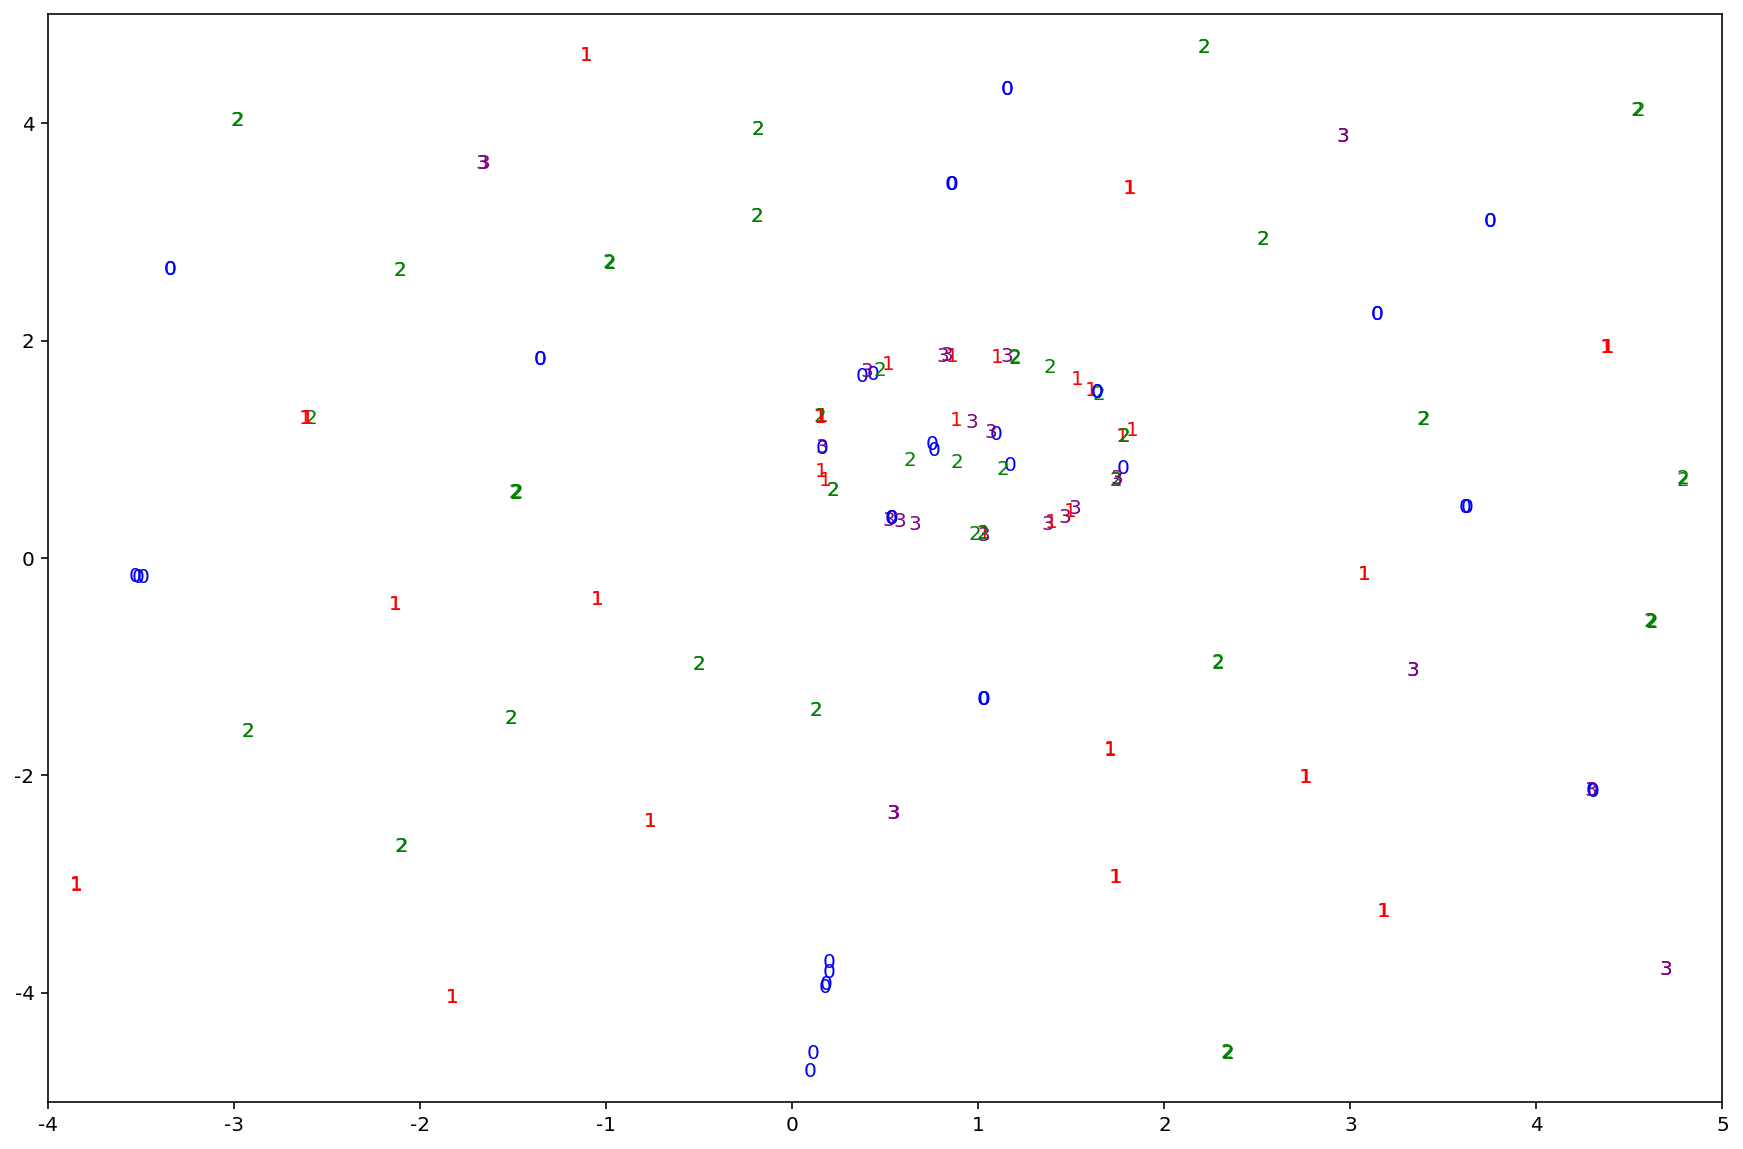

In [21]:
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

tsne = TSNE(n_components=2, random_state=7)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print("TSNE dimension:", tsne_tfidf.shape)


def tsne_graph(tsne_2, label, lim=None):
    colors = {0: "blue", 1: "red", 2: "green", 3: "purple"}
    x = tsne_2[:, 0]
    y = tsne_2[:, 1]
    plt.figure(figsize=(15, 10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    # for i in range(500):
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color=colors[label[i]])
    plt.show()


tsne_graph(tsne_tfidf, y_train, (-4, 5, -5, 5))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE dimension: (2034, 2)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


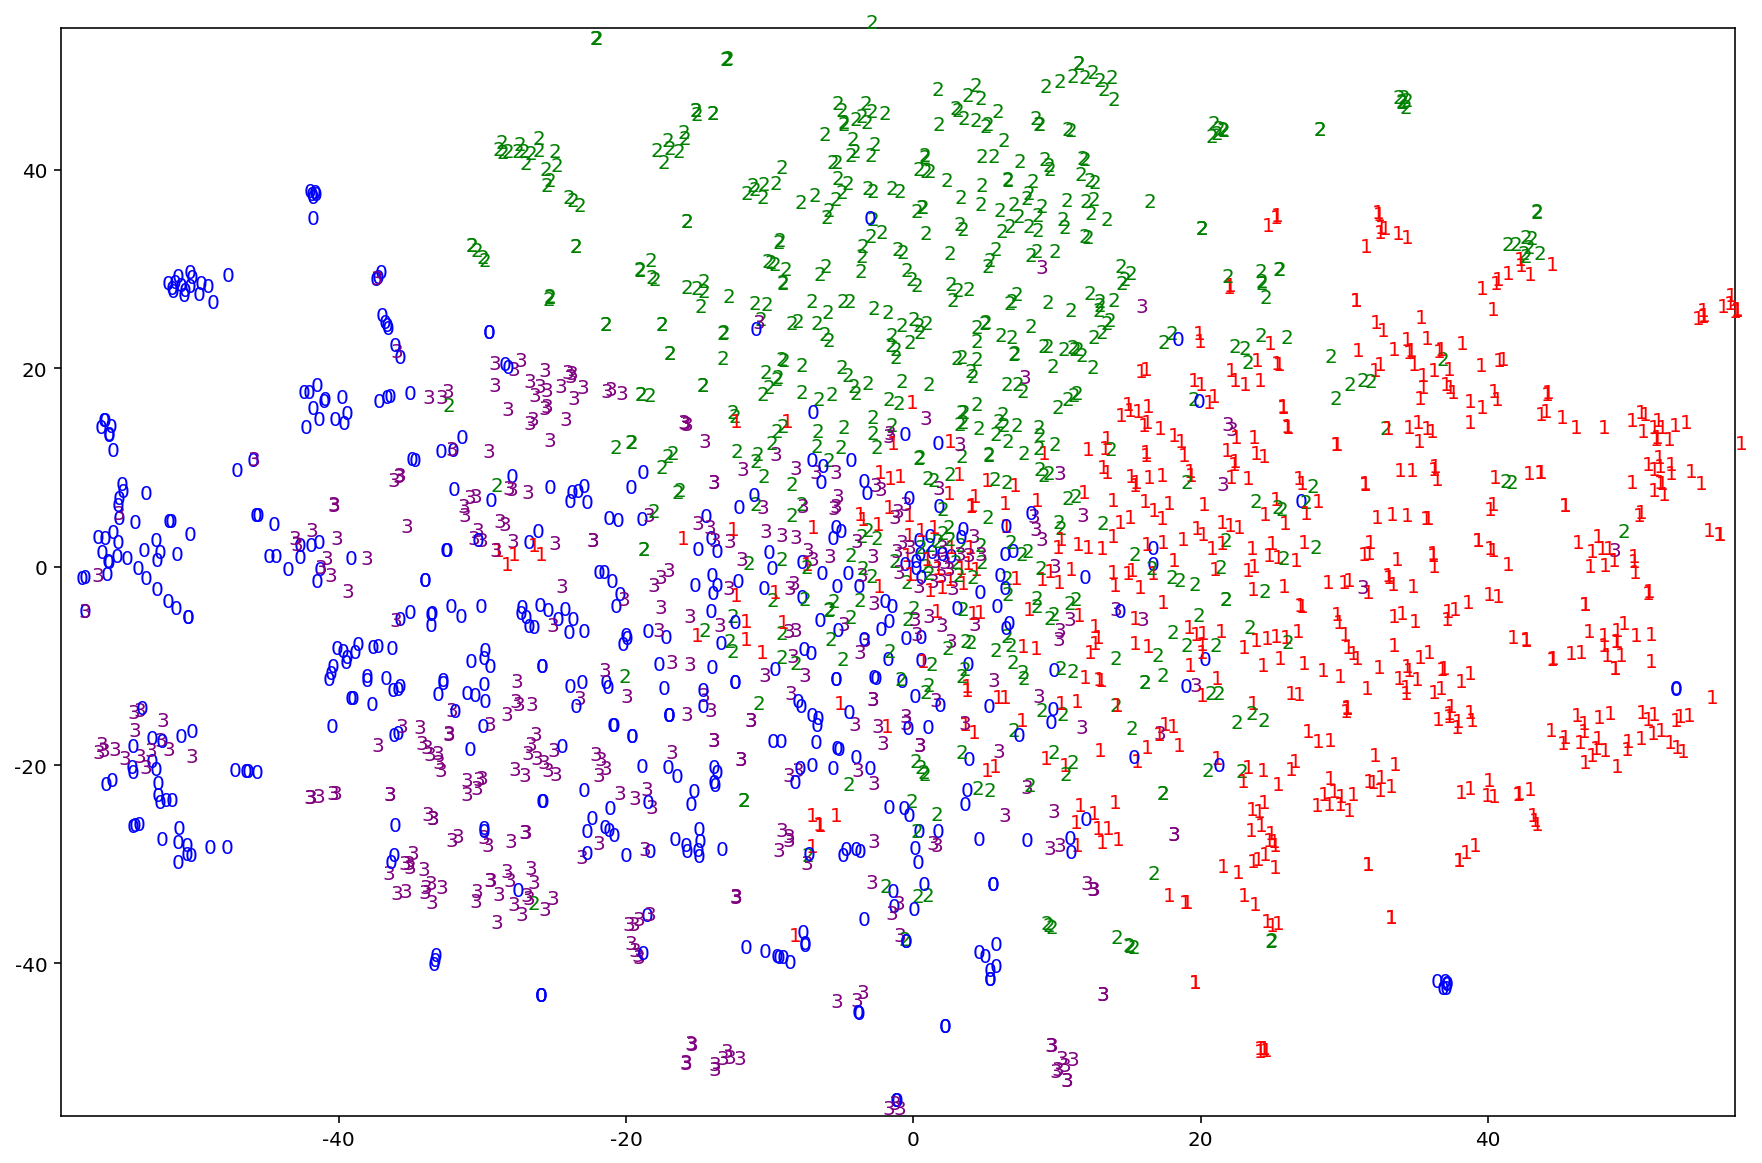

In [22]:
svd = TruncatedSVD(n_components=100, random_state=1)
X_train_lsa = svd.fit_transform(X_train_tfidf)
X_test_lsa = svd.transform(X_test_tfidf)

print("LSA Converted X shape:", X_train_lsa.shape)
print(
    "Sum of explained variance ratio: {:.3f}".format(
        svd.explained_variance_ratio_.sum()
    )
)

tsne_lsa = tsne.fit_transform(X_train_lsa)
print("TSNE dimension:", tsne_lsa.shape)
print("#Selected categories:", newsgroups_train.target_names)

tsne_graph(tsne_lsa, y_train)